# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: ADABOOST CLASSIFIER
2. Accuracy Score: 87%
3. Cross Validation Score: 86%
4. Final Accuracy Score(After Hyperparamter Tunning): 88%
5. AUC Score: 92%
6. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing, Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROBLEM STATEMENT(Red Wine Quality Project)

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!



Submission Details

- Share the link of the repository as your submission.  

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

# PROJECT CONTENTS
- Step 1: Attributes of Variables
- Step 2: LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
 - 2.1:Import all necessary libraries
 - 2.2:Load Dataset
 - 2.3:Descriptive Analysis
 - 2.4:Observations
- Step 3: Exploratory Data Analysis
 - 3.1:Normal Distribution Check
 - 3.2:Scatter Plot Check
 - 3.3:Correlation Check
 - 3.4:Outlier Check
 - 3.5:Skewness Check
 - 3.6:Target Variable Check
- Step 4: DATA PREPROCESSING
 - 4.1:Removal of Duplicates
 - 4.2:Arbitrary cutt-off of Target Variable
 - 4.3:Rechecking the current Relationship btw Variable
 - 4.4:Dropping of Features that strongly promotes multicollinearity(VIF)
 - 4.5:Removal of Outliers
 - 4.6:Transforming Data to Remove Skewness using Power transformation
 - 4.7:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
 - 5.1:Logistic Regression
 - 5.2:DecisionTree Classifier
 - 5.3:RandomForest Classifier
 - 5.4:AdaBoost Classifier
 - 5.5:GradientBoosting Classifier
 - 5.6:XGBoost Classifier
 - 5.7:ExtraTrees Classifier
 - 5.8:Support Vector Classifier(SVC)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
 - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
 - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:ROC AUC PLOT
- Step 9:MODEL SAVING

# Step 1 - ATTRIBUTES OF VARIABLES

1. fixed acidity - These are non-volatile acids that does not evaporate quickly
2. volatile acidity - These are acetic acid in wine which when high leads to an unpleasant vinegar taste
3. citric acid - This acts as a preservative to increase acidity. It can add 'freshness' and flavor to wines 
4. residual sugar - This is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance            between — sweetness and sourness (wines > 45g/ltrs are sweet)
5. chlorides - This represent the amount of salt in the wine 
6. free sulfur dioxide - This prevents microbial growth and the oxidation of wine 
7. total sulfur dioxide - This is the amount of free plus bound forms of SO2. In low concentrations, SO2 is mostly                  undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. density - This is the degree of compactness of the wine. Sweeter wines have a higher density
9. pH - This describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are            between 3-4 on the pH scaley
10. sulphates - This a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant           
11. alcohol Output variable (based on sensory data) - This is the quantity of alcohol in wine 
12. quality (score between 0 and 10) - This measures the standard of the wine against other things of a similar kind; 
    its the degree of excellence of wine

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
from scipy.stats import zscore
from sklearn.preprocessing import power_transform, PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [2]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#checking the first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking the last five rows
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
#picking 4 random samples
df.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1445,7.4,0.785,0.19,5.20,0.094,19.0,98.0,0.99713,3.16,0.52,9.6,6
766,8.8,0.590,0.18,2.90,0.089,12.0,74.0,0.99738,3.14,0.54,9.4,5
999,6.4,0.690,0.00,1.65,0.055,7.0,12.0,0.99162,3.47,0.53,12.9,6
378,11.4,0.625,0.66,6.20,0.088,6.0,24.0,0.99880,3.11,0.99,13.3,6


# Step 2.3 - Data Descriptive Analysis

In [6]:
#checking the data shape
df.shape

(1599, 12)

In [7]:
#checking for nature of datatypes
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
#Checking data full description
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#lets check the columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
#Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
#Checking for null values
df.isnull().sum().sum()

0

In [13]:
#Checking the goemetry of the Target column
from collections import Counter
print("The Value Counts in quality - ",Counter(df['quality']))

The Value Counts in quality -  Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


In [14]:
#Checking the count
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Step 2.4 - Observations


# The Dataset is made up of;
- 1599 rows and 12 columns
- 11 features and 1 Target

# Description of Features:
All the features have the following properties:
- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

# About the Target/Label:
quality: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is an Interger type
- It is made up of Categorical data


**Since the target is made up of a categorical data hence this is a CLASSIFICATION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 - Normal Distribution Check

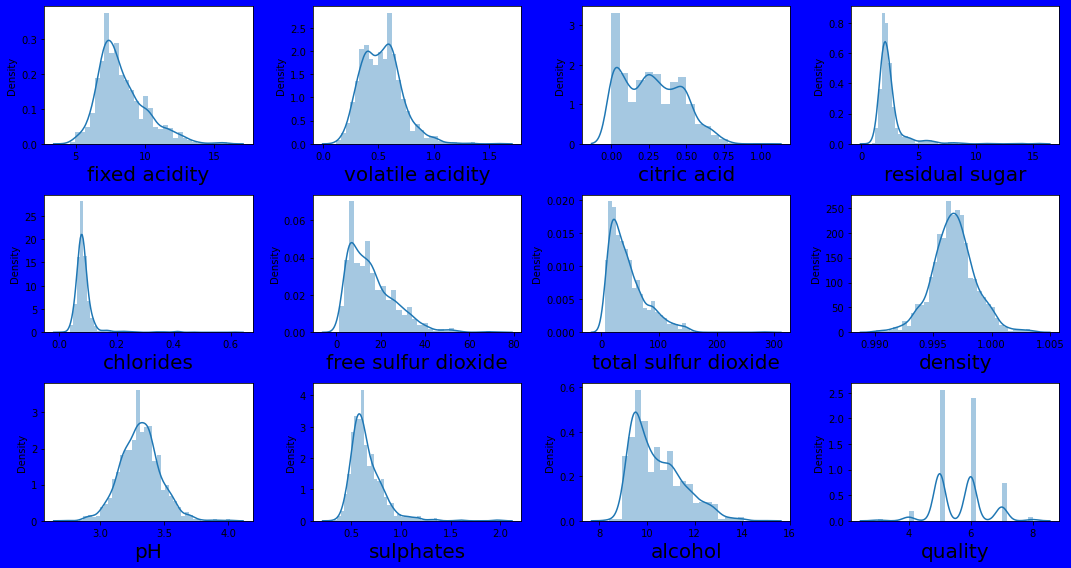

In [16]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=12:#since there are 6 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot we can see that multiple features does not obey a normal distribution, the building blocks is not in tandem with a normalized curve:

- fixed acidity
- volatile acidity(has two modes present or two peak points at the 0.3 and 0.6 mark)
- citric acid(has three modes present or three peak points at the 0 ,0.25 and 0.5 mark)
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- sulphates
- alchohol

***The normal distribution of the quality has no contribution to our Model Building

# Step 3.2 - Scatter Plot Check
- Lets visualize the relationship between the features and the Label

In [17]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop('quality',axis=1)
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


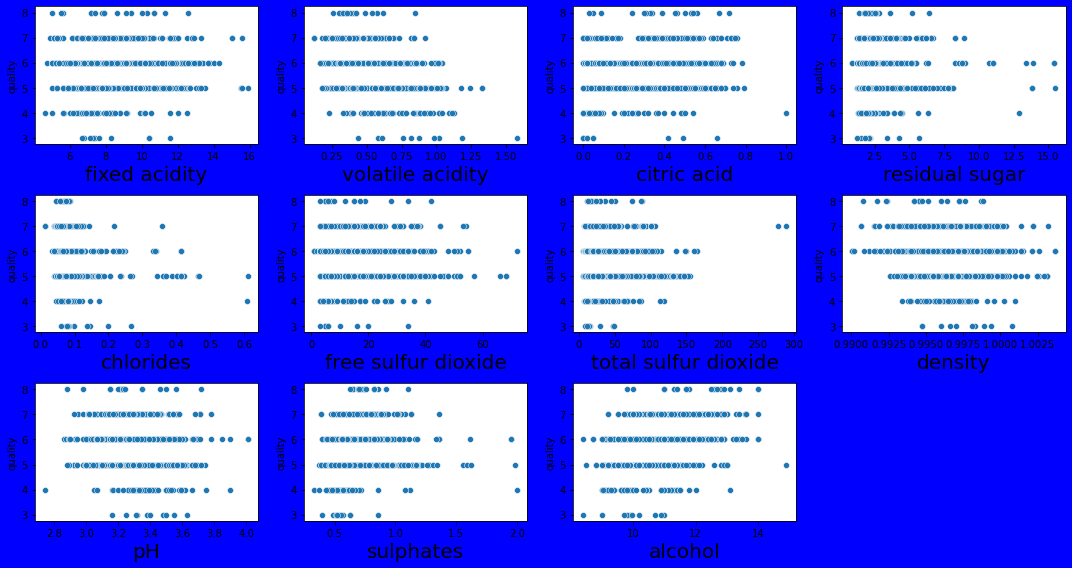

In [18]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=12:#since there are 6 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['quality'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot
From the above scatter plot we can see a strong relationship between the below features and the Label(Salary)

- fixed acidity
- citric acid
- free sulfur dioxide
- density
- pH
- alchohol


# Step 3.3 - Correlation Check;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [19]:
#checking for general correlation
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [20]:
#checking for correlation between each feature and Label
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

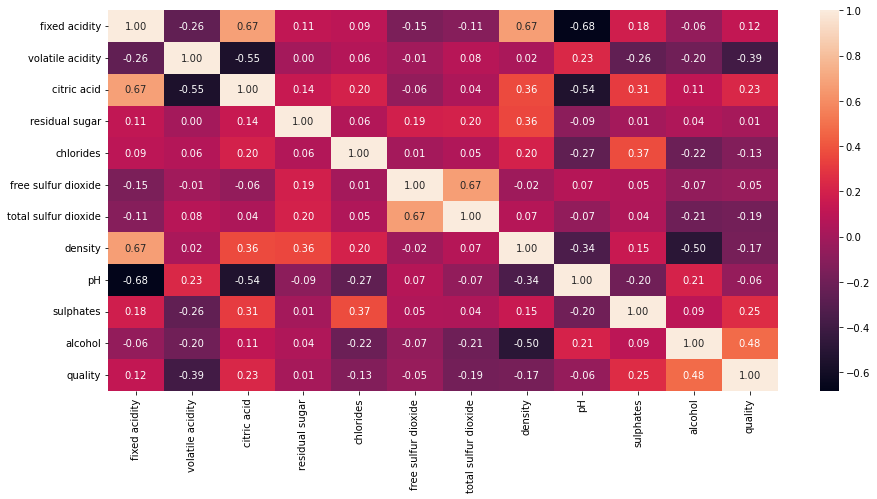

In [21]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

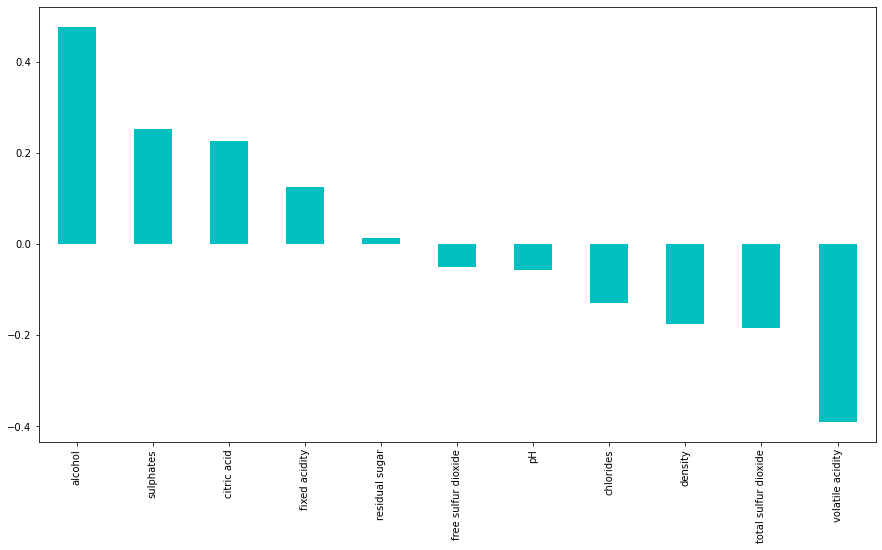

In [22]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar', color='c')
plt.show()

# Observations on Correlation
From the above correlation statistics;

Collinearity:
 - fixed acidity has a positive correlation of 12% with the target column which can be considered as fairly good bond
 - volatile acidity has a negative correlation of 39% with the target column which can be considered as good bond
 - citric acid has a positive correlation of 22% with the target column which can be considered as fairly good bond
 - residual sugar has a positive correlation of 1% with the target column which can be considered as a poor Bond!
 - chlorides has a negative correlation of 12% with the target column which can be considered as fairly good bond
 - free sulfur dioxide has a negative correlation of 5% with the target column which can be considered as a poor Bond!
 - total sulfur dioxide has a negative correlation of 18% with the target column which can be considered as fairly good bond
 - density has a negative correlation of 17% with the target column which can be considered as fairly good bond
 - pH has a negative correlation of 5% with the target column which can be considered as a poor Bond!
 - sulphates has a positive correlation of 25% with the target column which can be considered as fairly good bond
 - alcohol has a positive correlation of 47% with the target column which can be considered as good bond
 
 - Feature with Maximum correlation = alchohol
 - Feature with Minimum correlation = residual sugar
 
Multicollinearity:
 - From the heatmap we can see that the pairs of features have some noticeable correllation between them 
     - density vs fixed acidity has a correlation of 67%
     - citric vs fixed acidity has a correlation of 67%
     - free sulphur dioxide vs total sulphur dioxide has a correlation of 67%
But we will reconfrim during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.4 - Outlier Check

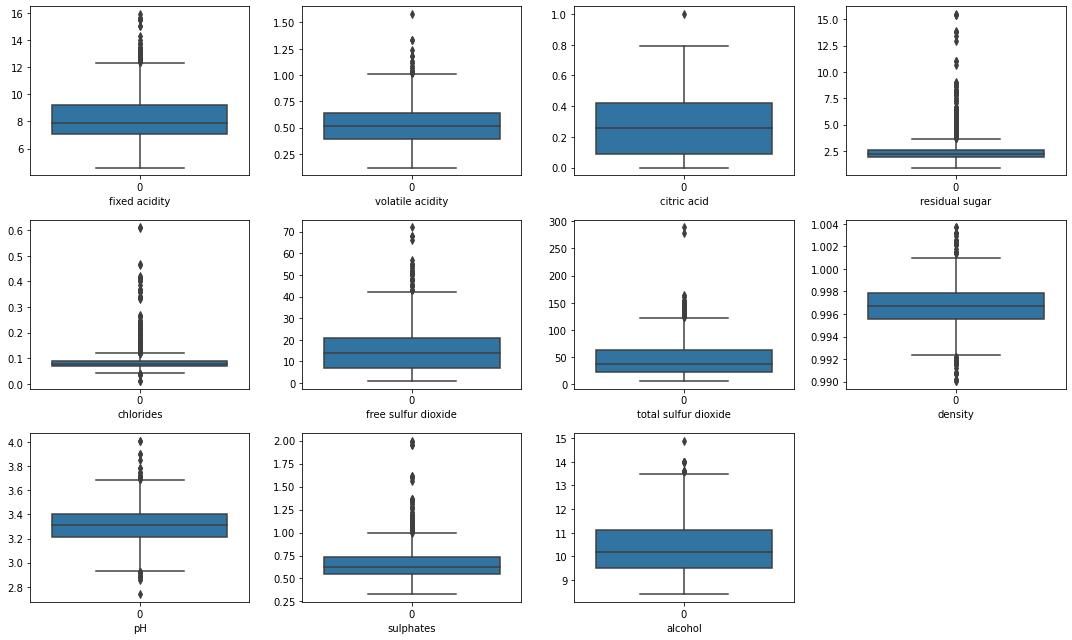

In [23]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if graph<=12:#this was made 12 just to allow for 6 spaces
        plt.subplot(3,4,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=features[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
From the above visualization plot its evident that all the features posses outliers, however this is subject to further analysis and reconfirmation using the zscore!

# Step 3.5 - Skewness Check

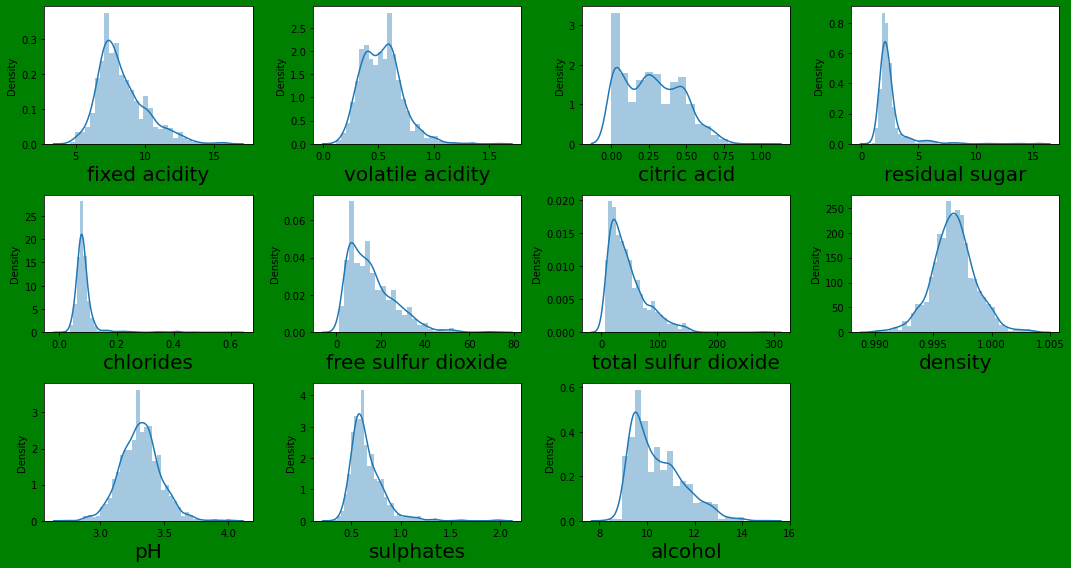

In [24]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=12:#since there are 6 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(features[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [25]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
features.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.65.Meaning any value outside +/-0.65 contains skewness. Hence majority of the Columns are having skewness:

 - fixed acidity:           0.98
 - volatile acidity:        0.67
 - residual sugar:          4.54
 - chlorides:               5.68
 - free sulfur dioxide:     1.25
 - total sulfur dioxide:    1.52
 - sulphates:               2.43
 - alcohol:                 0.86

# Step 3.6  - Target Variable Check

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


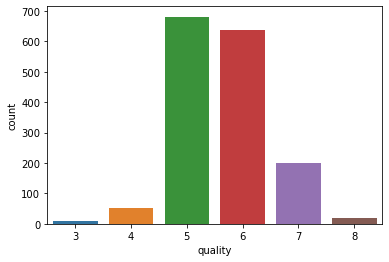

In [26]:
ax=sns.countplot(x='quality',data=df)
print(df['quality'].value_counts())

from the above graph the dependent variable has Six classes of quality with the majority being Class 5 and minority Class 3 

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates

In [27]:
#Recheking shape of original data
df.shape

(1599, 12)

In [28]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

 - It appears there are 240(1599-1359) rows with the same data across each columns and has been removed since the rows has decreased from 1599 to 1359

# Step 4.2 - Arbitrary Cut-off of Target Variable

Now lets reduce the classes of the dependent variable into a Binary class(0 and 1) to allow for hyperparameter tunning. We shall use the assumption, if:
 - If quality is >=7 then assign Class 1(which means 'good')
 - If quality is <7 then assign Class 0(which means 'not good')

In [29]:
#making a copy of the original data
df_cutoff=df.copy()
df_cutoff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
#replacing quality>=7 with 1 and quality<7 with 0 in the Label column and store in a new dataframe
df_cutoff['quality'] = df_cutoff['quality'].replace({range(7):0,range(7,20):1})#This is an Ordinal fashion from lowest to highest
df_cutoff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Now lets compare original data and new cutoff data to reconfirm the Binary values

In [31]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [32]:
df_cutoff['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

Here we can see that count for quality >=7 are 167+17=184 while quality <7 are 577+535+53+10=1175

0    1175
1     184
Name: quality, dtype: int64


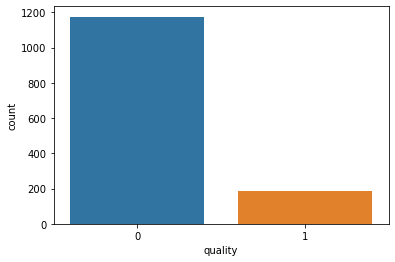

In [33]:
#Lets visualize data distribution amongst the new Binary classes
ax=sns.countplot(x='quality',data=df_cutoff)
print(df_cutoff['quality'].value_counts())

From the above graph we can see:
 - the dependent variable has now two classes of quality with the majority being Class 0 and minority Class 1
 - there is a clear case of imbalanced data and this will be resolved during futher preprocessing using sampling techniques

# Step 4.3 - Rechecking the current Relationship btw Variables

In [34]:
#seperating the variables into X and Y variables
X=df_cutoff.drop(columns=['quality'])
Y=df_cutoff['quality']

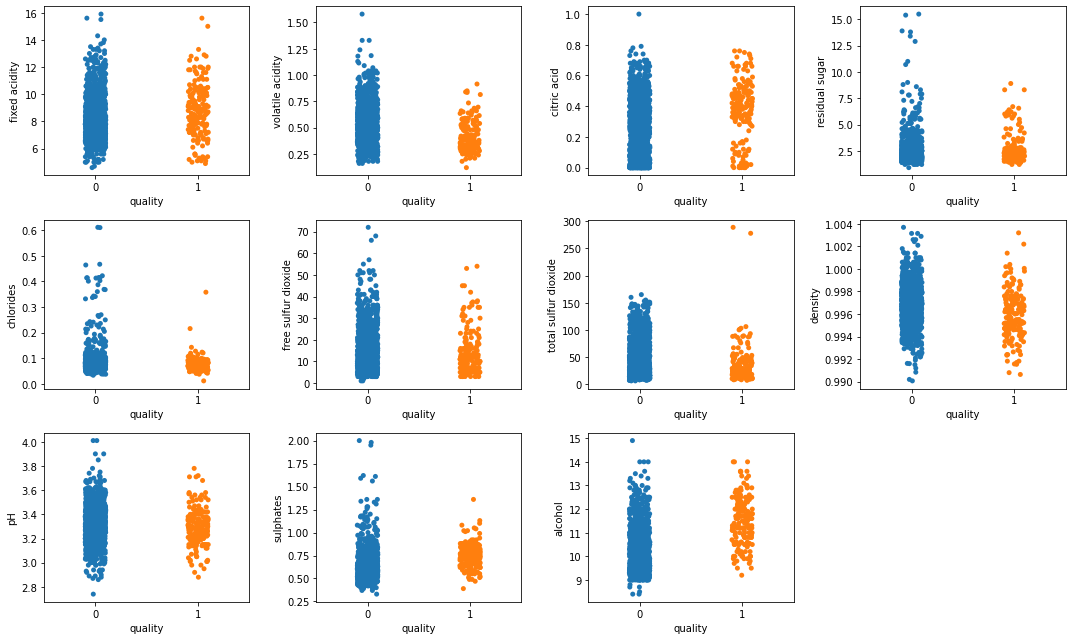

In [35]:
#Lets visualize our current data using a stripplot
plt.figure(figsize=(15,9))#dimension only
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in X:#triggering your for loop
    if plotnumber<=12:#since there are 9 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.stripplot(Y,X[column])#performing a strip plot
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#

From the above strip plot, you can see that;

fixed acidity
- A range of fixed acidity btw 2-13 shows a visible sign of poor quality
- A range of fixed acidity btw 13-16 show a slight sign of poor quality

volatile acidity
- A range of volatile acidity btw 0.25-0.50 shows a visible sign of good quality
- A range of volatile acidity btw 0.50-0.70 show a visible sign of poor quality

citirc acid
- A range of citirc acid btw 0.00-0.30 shows a visible sign of poor quality
- A range of citirc acid btw 0.30-0.70 shows a visible sign of good quality

residual sugar
- A range of residual sugar btw 1.25-2.50 shows a visible sign of good quality
- A range of residual sugar btw 2.50-10.00 show a slight sign of poor quality

chlorides
- A range of chlorides btw 0-0.1 shows a visible sign of good quality
- A range of chlorides btw 0.1-0.5 show a visible sign of poor quality

free sulphur dioxide
- A range of free sulphur dioxide btw 0-20 shows a visible sign of poor quality
- A range of free sulphur dioxide btw 20-50 show a visible sign of good quality

total sulphur dioxide
- A range of total sulphur dioxide btw 0-50 shows a visible sign of good quality
- A range of total sulphur dioxide btw 50-150 show a visible sign of poor quality

density
- A range of density btw 0.993-1001 shows a visible sign of poor quality
- A range of density btw 0.994-0.998 show a visible sign of good quality

pH
- A range of pH btw 3-3.6 shows a visible sign of poor quality
- A range of pH btw 3.1-3.5 show a sign of good quality

sulphates
- A range of sulphates btw 0.5-0.75 shows a visible sign of good quality
- A range of sulphates btw 0.75-1.5 show a slight sign of poor quality

alchohol
- A range of alchohol btw 9-11 shows a visible sign of poor quality
- A range of alchohol btw 11-13 show a slight sign of poor quality

# Step 4.4 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

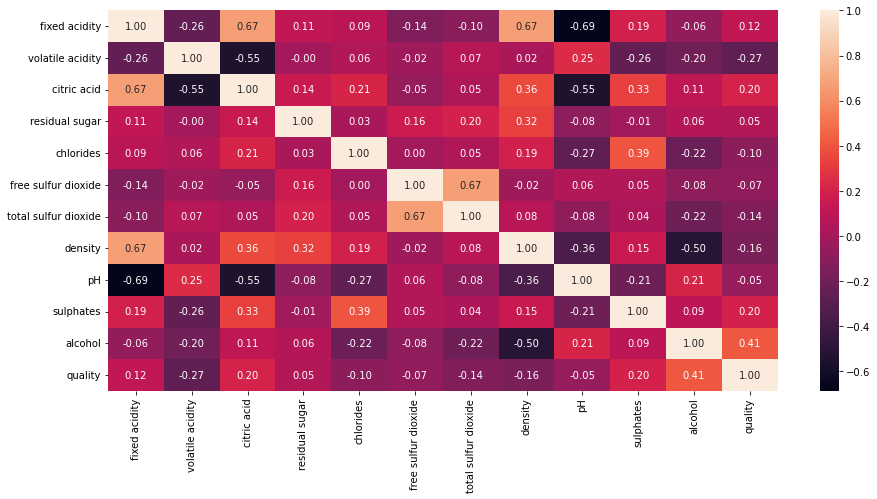

In [36]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df_cutoff.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap we can see that the pairs of features have some noticeable correllation between them;
 - density vs fixed acidity has a correlation of 67%
 - citric vs fixed acidity has a correlation of 67%
 - free sulphur dioxide vs total sulphur dioxide has a correlation of 67% 

However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [37]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

In [38]:
#checking the shape
X_Scaled.shape

(1359, 11)

Now we shall treat the above shape as an array of numbers(tuple) where 1359 and 11 are the zeroth and first index respectively.

In [39]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [40]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(11) or (0,1,2,3,4,5,6,7,8,9,10), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 11. Now all the columns in X_Scaled which is (0,1,2,3,4,5,6,7,8,9,10,) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [41]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘quality’ )
vif

,vif,Features
0,7.880951,fixed acidity
1,1.777884,volatile acidity
2,3.124679,citric acid
3,1.641987,residual sugar
4,1.530769,chlorides
5,1.950922,free sulfur dioxide
6,2.216688,total sulfur dioxide
7,6.281009,density
8,3.397407,pH
9,1.466779,sulphates


From the above vif dataframe,we are setting a vif threshold of 5, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, we have to drop the following features
 - fixed acidity
 - density

In [42]:
df_cutoff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [43]:
#Dropping columns as stated
df_cutoff=df_cutoff.drop(columns=['fixed acidity','density'],axis=1)
df_cutoff

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
5,0.660,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1593,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5,0
1594,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0
1595,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,0
1597,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0


# Step 4.5 - Removal of Outliers

This will be achieved using the zscore

In [44]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df_cutoff))

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.932000,1.393258,0.461157,0.245623,0.468554,0.384050,1.291872,0.578561,0.954374,0.395722
1,1.915800,1.393258,0.056665,0.200094,0.872003,0.604073,0.708395,0.124822,0.584575,0.395722
2,1.259934,1.188617,0.165259,0.078535,0.085537,0.214813,0.321247,0.051024,0.584575,0.395722
3,1.363534,1.471711,0.461157,0.265883,0.105971,0.394471,0.966495,0.461331,0.584575,0.395722
5,0.713378,1.393258,0.535132,0.265883,0.277045,0.204391,1.291872,0.578561,0.954374,0.395722
...,...,...,...,...,...,...,...,...,...,...
1593,0.494756,0.983977,0.461157,0.407702,1.159265,0.264277,0.711149,0.945435,0.861924,0.395722
1594,0.385444,0.983977,0.387183,0.038015,1.542281,0.084619,0.904724,0.461331,0.062574,0.395722
1595,0.112167,0.881656,0.239233,0.529261,2.212559,0.124983,1.356397,0.593744,0.709723,0.395722
1597,0.631395,0.779336,0.387183,0.265883,1.542281,0.084619,1.679021,0.300667,0.214775,0.395722


In [45]:
#checking the data shape
z=np.abs(zscore(df_cutoff))
z.shape

(1359, 10)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [46]:
#index number
np.where(z>3)

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
          41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
          99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
         150,  159,  176,  202,  202,  211,  226,  226,  241,  245,  252,
         282,  295,  296,  309,  346,  346,  361,  363,  393,  408,  420,
         433,  448,  492,  506,  510,  513,  516,  534,  555,  562,  562,
         564,  565,  565,  582,  582,  592,  597,  599,  602,  626,  627,
         632,  652,  671,  672,  687,  710,  764,  781,  786,  791,  792,
         838,  888,  895,  895,  912,  918,  918,  920,  920,  945,  963,
         985,  994, 1003, 1013, 1049, 1052, 1060, 1060, 1060, 1073, 1081,
        1082, 1103, 1106, 1107, 1117, 1121, 1123, 1123, 1125, 1151, 1159,
        1162, 1165, 1216, 1216, 1250, 1250, 1325, 1325, 1336, 1350],
       dtype=int64),
 array([7, 4, 4, 5, 3, 7, 3, 2, 0, 3, 7, 6, 4, 3, 7, 3, 7, 7, 7, 6, 3, 7,
        5, 0, 0, 8, 1,

In [47]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df_cutoff[(z<3).all(axis=1)]
print("Old DataFrame",df_cutoff.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df_cutoff.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (1359, 10)
New DataFrame (1251, 10)
total_dropped_rows 108


A Total of 108 outliers have been removed! Lets move on!

In [48]:
#Checking the new dataframe with non-outliers
df_new

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
5,0.660,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1593,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5,0
1594,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0
1595,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,0
1597,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0


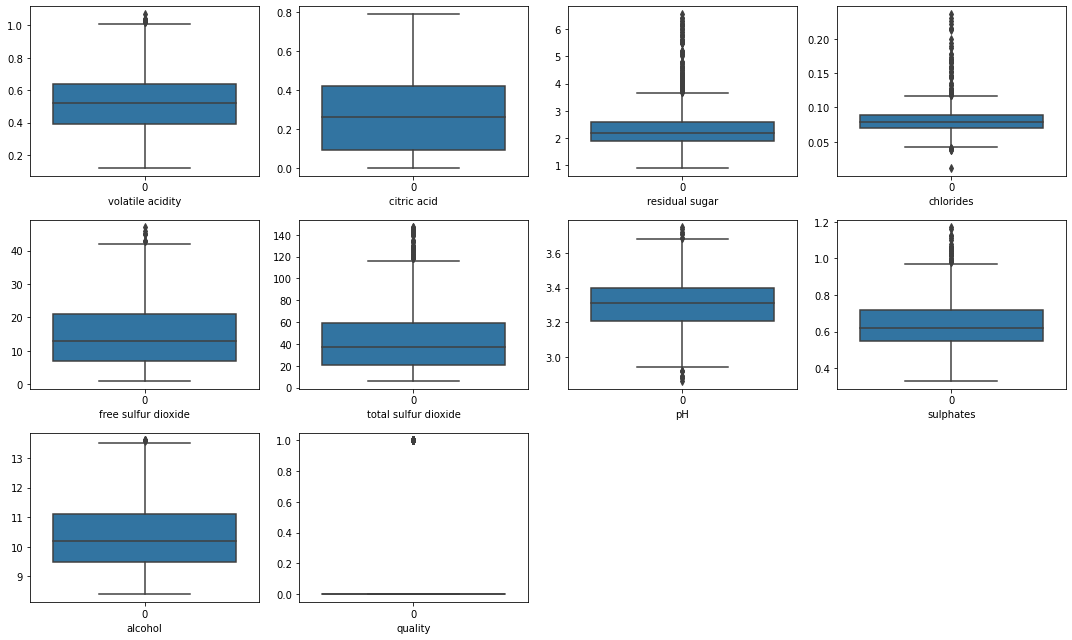

In [49]:
#reChecking for allien-datapoints in each features data which are now stored in df_new
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=12:#this was made 12 just to allow for 6 spaces
        plt.subplot(3,4,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_new[column])#performing a box plot starting with 
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that the real outliers have been removed across the features!

# Step 4.6 - Transforming Data to Remove Skewness using Power transformation

In [50]:
#rechecking for skewness...
df_new.skew()

volatile acidity        0.437499
citric acid             0.279851
residual sugar          2.311178
chlorides               2.420145
free sulfur dioxide     0.870681
total sulfur dioxide    1.160194
pH                      0.046138
sulphates               0.929096
alcohol                 0.759369
quality                 2.107917
dtype: float64

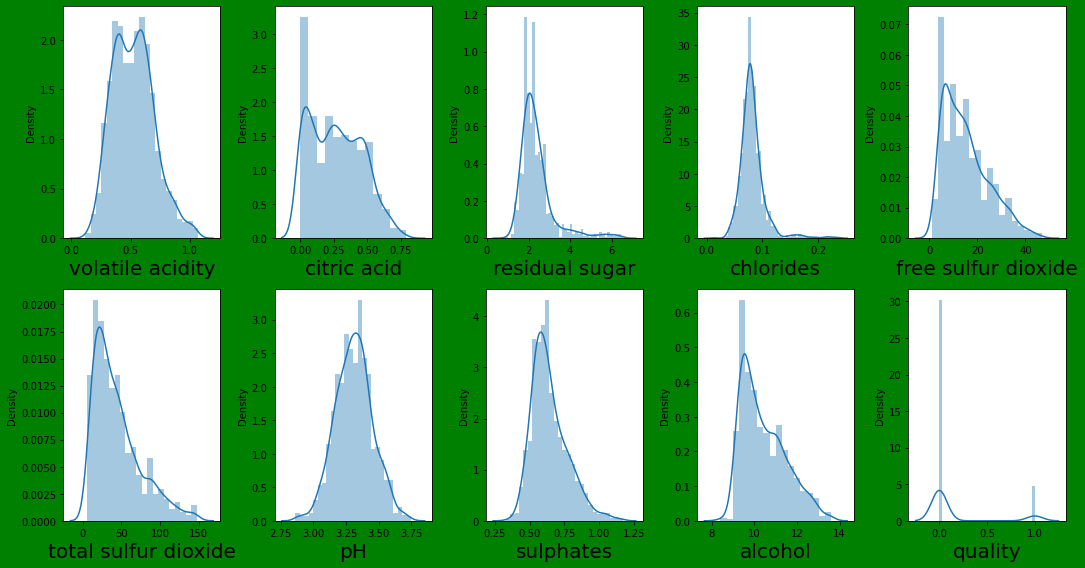

In [51]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=10:#since there are 6 features
        ax = plt.subplot(2,5,plotnumber)#2,5 means arrange the graphs in 2-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 10
plt.tight_layout()#This is just to show you data in a compact form. 

Let lets go ahead and apply Power Transformation!

In [52]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [53]:
df_new.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

In [54]:
#extracting the columns that are skewed
data=['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol']

In [55]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

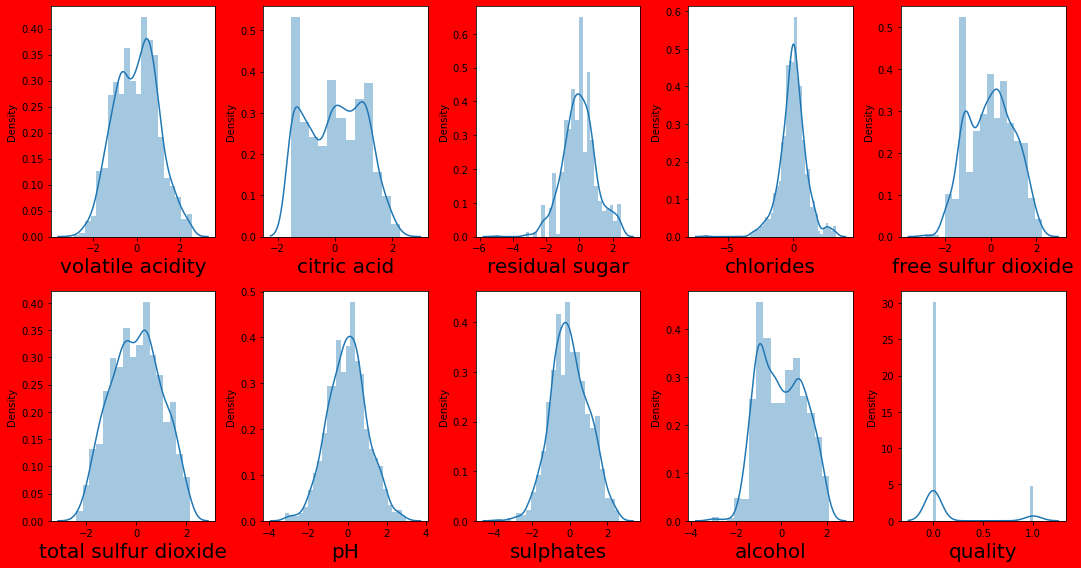

In [56]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=10:#since there are 6 features
        ax = plt.subplot(2,5,plotnumber)#2,5 means arrange the graphs in 2-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 10
plt.tight_layout()#This is just to show you data in a compact form. 

From the above we can see that skewness has been removed!

# Step 4.7 - Seperating the datasets into X and Y variables

In [57]:
#seperation
X=df_new.drop(columns=['quality'])
Y=df_new['quality']

# Transforming data into standard normal distribution

In [58]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 1.02741467, -1.52554864, -0.61598775, ...,  1.37934678,
        -0.58828773, -1.09448534],
       [ 1.84366614, -1.52554864,  0.62114298, ..., -0.77270735,
         0.45481099, -0.52200888],
       [ 1.31412475, -1.25122753,  0.18175265, ..., -0.35085819,
         0.2234017 , -0.52200888],
       ...,
       [ 0.23510573, -0.8638797 ,  0.00866875, ...,  1.44766431,
         0.99424822,  0.88252059],
       [ 0.7501827 , -0.74067189, -0.38792899, ...,  1.78825817,
         0.66953687, -0.03804465],
       [-1.32158096,  1.0485587 ,  1.53880285, ...,  0.55426811,
         0.30248905,  0.72558036]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [59]:
#reconfirming that mean is 0
X_Scaled.mean()

0.0

In [60]:
#reconfirming that standard deviation is 1
X_Scaled.std()

0.9999999999999999

# Imbalancing of Target Variable

0    1175
1     184
Name: quality, dtype: int64


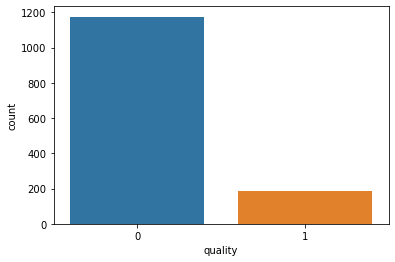

In [61]:
#Lets visualize data distribution amongst the new Binary classes
ax=sns.countplot(x='quality',data=df_cutoff)
print(df_cutoff['quality'].value_counts())

From the above graph we can see:

- the dependent variable has two classes of quality with the majority being Class 0 and minority Class 1
- there is a clear case of imbalanced data and this will be resolved during futher preprocessing using sampling techniques

# Step 5 - MODEL BUILDING

# Step 5.1 - Logistic Regression

# Best Random State and Balancing Target Data(Oversampling)

In [62]:
#Using LogisticRegression to get the best Random state and apply SMOTE Oversampling technique
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    lr.fit(x_train_ns,y_train_ns)
    pred_train=lr.predict(x_train_ns)
    pred_test=lr.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 863, 1: 137})
The number of classes before fitCounter({0: 863, 1: 647})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  85.7 and 81.7 respectively
The number of classes before fitCounter({0: 866, 1: 134})
The number of classes before fitCounter({0: 866, 1: 649})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  80.1 and 82.6 respectively
The number of classes before fitCounter({0: 859, 1: 141})
The number of classes before fitCounter({0: 859, 1: 644})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  81.3 and 82.8 respectively
The number of classes before fitCounter({0: 864, 1: 136})
The number of classes before fitCounter({0: 864, 1: 648})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  81.7 and 83.1 respectively
The number of classes before fitCounter({0: 853, 1: 147})
The number of classes before fitCounter({0: 853, 1: 639})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 89.6% at random state 81

We have found best_random state value as 81. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=81,test_size=0.20)

In [64]:
x_train.shape

(1000, 9)

In [65]:
x_test.shape

(251, 9)

In [66]:
y_train.shape

(1000,)

In [67]:
y_test.shape

(251,)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [68]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 852, 1: 148})
The number of classes after fitCounter({0: 852, 1: 639})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 148 to 639.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [69]:
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train_ns)
Test_Accuracy_lr= (accuracy_score(y_test,pred_test))
Train_Accuracy_lr= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  89.24
Confusion Matrix  [[202  25]
 [  2  22]]
Classification Report                precision    recall  f1-score   support

           0       0.99      0.89      0.94       227
           1       0.47      0.92      0.62        24

    accuracy                           0.89       251
   macro avg       0.73      0.90      0.78       251
weighted avg       0.94      0.89      0.91       251



LogisticRegression is producing good accuracy 89.24%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [70]:
#Validation accuracy
vac=cross_val_score(lr,X,Y,cv=5)
CV_Score_lr=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lr)

[0.87250996 0.852      0.888      0.86       0.888     ]
Cross Validation Score is  0.8721019920318724


# Difference between Accuracy Score and Cross Validation Score

In [71]:
Test_Accuracy_lr

0.8924302788844621

In [72]:
CV_Score_lr

0.8721019920318724

In [73]:
lr_Acc_vs_CV_Score=np.abs(Test_Accuracy_lr-CV_Score_lr)
print("Difference between Accuracy and Cross Validation Score = ",lr_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.020328286852589694


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.02) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Step 5.2 - DecisionTree Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [74]:
#Using Decision tree Classifier to get the best Random state and apply SMOTE Oversampling technique
dt=DecisionTreeClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    dt.fit(x_train_ns,y_train_ns)
    pred_train=dt.predict(x_train_ns)
    pred_test=dt.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 863, 1: 137})
The number of classes before fitCounter({0: 863, 1: 647})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  81.3 and 100.0 respectively
The number of classes before fitCounter({0: 866, 1: 134})
The number of classes before fitCounter({0: 866, 1: 649})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  79.3 and 100.0 respectively
The number of classes before fitCounter({0: 859, 1: 141})
The number of classes before fitCounter({0: 859, 1: 644})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  82.1 and 100.0 respectively
The number of classes before fitCounter({0: 864, 1: 136})
The number of classes before fitCounter({0: 864, 1: 648})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  81.3 and 100.0 respectively
The number of classes before fitCounter({0: 853, 1: 147})
The number of classes before fitCounter({0: 853, 1: 639})
At random state:- 4 Testing Accuracy and Tra

The best accuracy is 87.3% at random state 186

We have found best random state value as 186. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=186,test_size=0.20)

In [76]:
x_train.shape

(1000, 9)

In [77]:
x_test.shape

(251, 9)

In [78]:
y_train.shape

(1000,)

In [79]:
y_test.shape

(251,)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points. 

In [80]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 852, 1: 148})
The number of classes after fitCounter({0: 852, 1: 639})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 148 to 639.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [81]:
dt=LogisticRegression()
dt.fit(x_train_ns,y_train_ns)
pred_test=dt.predict(x_test)
pred_train=dt.predict(x_train_ns)
Test_Accuracy_dt= (accuracy_score(y_test,pred_test))
Train_Accuracy_dt= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  85.66
Confusion Matrix  [[197  30]
 [  6  18]]
Classification Report                precision    recall  f1-score   support

           0       0.97      0.87      0.92       227
           1       0.38      0.75      0.50        24

    accuracy                           0.86       251
   macro avg       0.67      0.81      0.71       251
weighted avg       0.91      0.86      0.88       251



Decision Tree Model is producing good accuracy - 85.66%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [82]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.87250996 0.852      0.888      0.86       0.888     ]
Cross Validation Score is  0.8721019920318724


# Difference between Accuracy Score and Cross Validation Score

In [83]:
Test_Accuracy_dt

0.8565737051792829

In [84]:
CV_Score_dt

0.8721019920318724

In [85]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.015528286852589557


From the above you can see that difference between Accuracy and Cross Validation score is low(0.015) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets try ensembling Techniques!

# Step 5.3 - RandomForest Classifier

# Best Random State and Balancing Data(Oversampling)

In [86]:
#Using RandomForest Classifier to get the best Random state and apply SMOTE Oversampling technique
rf=RandomForestClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    rf.fit(x_train_ns,y_train_ns)
    pred_train=rf.predict(x_train_ns)
    pred_test=rf.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 863, 1: 137})
The number of classes before fitCounter({0: 863, 1: 647})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  88.8 and 100.0 respectively
The number of classes before fitCounter({0: 866, 1: 134})
The number of classes before fitCounter({0: 866, 1: 649})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  86.1 and 100.0 respectively
The number of classes before fitCounter({0: 859, 1: 141})
The number of classes before fitCounter({0: 859, 1: 644})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  86.9 and 100.0 respectively
The number of classes before fitCounter({0: 864, 1: 136})
The number of classes before fitCounter({0: 864, 1: 648})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  88.8 and 100.0 respectively
The number of classes before fitCounter({0: 853, 1: 147})
The number of classes before fitCounter({0: 853, 1: 639})
At random state:- 4 Testing Accuracy and Tra

The best accuracy is 91.2% at random state 81

We have found best_random state value as 81. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [87]:
#using the random state of 81
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=81,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [88]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 852, 1: 148})
The number of classes after fitCounter({0: 852, 1: 639})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 148 to 639.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [89]:
rf=RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train_ns)
Test_Accuracy_rf= (accuracy_score(y_test,pred_test))
Train_Accuracy_rf= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  91.63
Confusion Matrix  [[217  10]
 [ 11  13]]
Classification Report                precision    recall  f1-score   support

           0       0.95      0.96      0.95       227
           1       0.57      0.54      0.55        24

    accuracy                           0.92       251
   macro avg       0.76      0.75      0.75       251
weighted avg       0.91      0.92      0.92       251



RandomForest Classifier is producing good accuracy = 91.63%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [90]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.88047809 0.844      0.876      0.876      0.88      ]
Cross Validation Score is  0.8712956175298805


# Difference between Accuracy Score and Cross Validation Score

In [91]:
Test_Accuracy_rf

0.9163346613545816

In [92]:
CV_Score_rf

0.8712956175298805

In [93]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.04503904382470114


From the above you can see that difference between Accuracy and Cross Validation score is very low(0.045) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further ensemble Models!

# Step 5.4 - AdaBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [94]:
#Using AdaBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
ada=AdaBoostClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ada.fit(x_train_ns,y_train_ns)
    pred_train=ada.predict(x_train_ns)
    pred_test=ada.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 863, 1: 137})
The number of classes before fitCounter({0: 863, 1: 647})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  87.3 and 89.2 respectively
The number of classes before fitCounter({0: 866, 1: 134})
The number of classes before fitCounter({0: 866, 1: 649})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  83.3 and 87.7 respectively
The number of classes before fitCounter({0: 859, 1: 141})
The number of classes before fitCounter({0: 859, 1: 644})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  84.1 and 88.7 respectively
The number of classes before fitCounter({0: 864, 1: 136})
The number of classes before fitCounter({0: 864, 1: 648})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  82.1 and 87.6 respectively
The number of classes before fitCounter({0: 853, 1: 147})
The number of classes before fitCounter({0: 853, 1: 639})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 88.4% at random state 186

We have found best_random state value as 186. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [95]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=186,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [96]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 852, 1: 148})
The number of classes after fitCounter({0: 852, 1: 639})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 148 to 639.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [97]:
ada=AdaBoostClassifier()
ada.fit(x_train_ns,y_train_ns)
pred_test=ada.predict(x_test)
pred_train=ada.predict(x_train_ns)
Test_Accuracy_ada= (accuracy_score(y_test,pred_test))
Train_Accuracy_ada= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  86.85
Confusion Matrix  [[204  23]
 [ 10  14]]
Classification Report                precision    recall  f1-score   support

           0       0.95      0.90      0.93       227
           1       0.38      0.58      0.46        24

    accuracy                           0.87       251
   macro avg       0.67      0.74      0.69       251
weighted avg       0.90      0.87      0.88       251



AdaBoostClassifier is producing good accuracy = 86.85%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [98]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[0.88844622 0.832      0.868      0.824      0.868     ]
Cross Validation Score is  0.8560892430278884


# Difference between Accuracy Score and Cross Validation Score

In [99]:
Test_Accuracy_ada

0.8685258964143426

In [100]:
CV_Score_ada

0.8560892430278884

In [101]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.012436653386454277


From the above you can see that difference between Accuracy and Cross Validation score is negligible(0.012) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further Models!

# Step 5.5 - GradientBoosting Classifier

# Best Random State and Balancing Data(Oversampling)

In [102]:
#Using GradientBoosting Classifier to get the best Random state and apply SMOTE Oversampling technique
gb=GradientBoostingClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    gb.fit(x_train_ns,y_train_ns)
    pred_train=gb.predict(x_train_ns)
    pred_test=gb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 863, 1: 137})
The number of classes before fitCounter({0: 863, 1: 647})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  86.9 and 94.7 respectively
The number of classes before fitCounter({0: 866, 1: 134})
The number of classes before fitCounter({0: 866, 1: 649})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  83.3 and 94.5 respectively
The number of classes before fitCounter({0: 859, 1: 141})
The number of classes before fitCounter({0: 859, 1: 644})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  84.9 and 94.9 respectively
The number of classes before fitCounter({0: 864, 1: 136})
The number of classes before fitCounter({0: 864, 1: 648})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  85.7 and 95.2 respectively
The number of classes before fitCounter({0: 853, 1: 147})
The number of classes before fitCounter({0: 853, 1: 639})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 89.2% at random state 186

We have found best_random state value as 186. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [103]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=186,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [104]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 852, 1: 148})
The number of classes after fitCounter({0: 852, 1: 639})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 148 to 639.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [105]:
gb=GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_test=gb.predict(x_test)
pred_train=gb.predict(x_train_ns)
Test_Accuracy_gb= (accuracy_score(y_test,pred_test))
Train_Accuracy_gb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  89.24
Confusion Matrix  [[208  19]
 [  8  16]]
Classification Report                precision    recall  f1-score   support

           0       0.96      0.92      0.94       227
           1       0.46      0.67      0.54        24

    accuracy                           0.89       251
   macro avg       0.71      0.79      0.74       251
weighted avg       0.91      0.89      0.90       251



GradientBoosting Classifier is producing good accuracy = 89.24%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [106]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.87250996 0.832      0.888      0.868      0.88      ]
Cross Validation Score is  0.8681019920318725


# Difference between Accuracy Score and Cross Validation Score

In [107]:
Test_Accuracy_gb

0.8924302788844621

In [108]:
CV_Score_gb

0.8681019920318725

In [109]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.024328286852589587


From the above you can see that difference between Accuracy and Cross Validation score is low(0.024) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Step 5.6 - XGBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [110]:
#Using XGBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
xgb=XGBClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    xgb.fit(x_train_ns,y_train_ns)
    pred_train=xgb.predict(x_train_ns)
    pred_test=xgb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 863, 1: 137})
The number of classes before fitCounter({0: 863, 1: 647})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  86.9 and 100.0 respectively
The number of classes before fitCounter({0: 866, 1: 134})
The number of classes before fitCounter({0: 866, 1: 649})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  86.9 and 100.0 respectively
The number of classes before fitCounter({0: 859, 1: 141})
The number of classes before fitCounter({0: 859, 1: 644})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  87.6 and 100.0 respectively
The number of classes before fitCounter({0: 864, 1: 136})
The number of classes before fitCounter({0: 864, 1: 648})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  86.5 and 100.0 respectively
The number of classes before fitCounter({0: 853, 1: 147})
The number of classes before fitCounter({0: 853, 1: 639})
At random state:- 4 Testing Accuracy and Tra

The best accuracy is 91.2% at random state 81

We have found best_random state value as 81. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [111]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=81,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [112]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 852, 1: 148})
The number of classes after fitCounter({0: 852, 1: 639})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 148 to 639.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [113]:
xgb=XGBClassifier()
xgb.fit(x_train_ns,y_train_ns)
pred_test=xgb.predict(x_test)
pred_train=xgb.predict(x_train_ns)
Test_Accuracy_xgb= (accuracy_score(y_test,pred_test))
Train_Accuracy_xgb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  92.83
Confusion Matrix  [[217  10]
 [  8  16]]
Classification Report                precision    recall  f1-score   support

           0       0.96      0.96      0.96       227
           1       0.62      0.67      0.64        24

    accuracy                           0.93       251
   macro avg       0.79      0.81      0.80       251
weighted avg       0.93      0.93      0.93       251



XGBoost Classifier is producing good accuracy - 92.83%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [114]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.88047809 0.828      0.876      0.836      0.88      ]
Cross Validation Score is  0.8600956175298805


# Difference between Accuracy Score and Cross Validation Score

In [115]:
Test_Accuracy_xgb

0.9282868525896414

In [116]:
CV_Score_xgb

0.8600956175298805

In [117]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.06819123505976088


From the above you can see that difference between Accuracy and Cross Validation score is low(0.068) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# Step 5.7 - ExtraTrees Classifier

# Best Random State and Balancing Data(Oversampling)

In [118]:
#Using ExtraTrees Classifier to get the best Random state and apply SMOTE Oversampling technique
ex=ExtraTreesClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ex.fit(x_train_ns,y_train_ns)
    pred_train=ex.predict(x_train_ns)
    pred_test=ex.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 863, 1: 137})
The number of classes before fitCounter({0: 863, 1: 647})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  88.8 and 100.0 respectively
The number of classes before fitCounter({0: 866, 1: 134})
The number of classes before fitCounter({0: 866, 1: 649})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  85.3 and 100.0 respectively
The number of classes before fitCounter({0: 859, 1: 141})
The number of classes before fitCounter({0: 859, 1: 644})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  88.8 and 100.0 respectively
The number of classes before fitCounter({0: 864, 1: 136})
The number of classes before fitCounter({0: 864, 1: 648})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  89.2 and 100.0 respectively
The number of classes before fitCounter({0: 853, 1: 147})
The number of classes before fitCounter({0: 853, 1: 639})
At random state:- 4 Testing Accuracy and Tra

The best accuracy is 93.2% at random state 81

We have found best_random state value as 81. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [119]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=81,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [120]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 852, 1: 148})
The number of classes after fitCounter({0: 852, 1: 639})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 148 to 639.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [121]:
ex=ExtraTreesClassifier()
ex.fit(x_train_ns,y_train_ns)
pred_test=ex.predict(x_test)
pred_train=ex.predict(x_train_ns)
Test_Accuracy_ex= (accuracy_score(y_test,pred_test))
Train_Accuracy_ex= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  92.43
Confusion Matrix  [[218   9]
 [ 10  14]]
Classification Report                precision    recall  f1-score   support

           0       0.96      0.96      0.96       227
           1       0.61      0.58      0.60        24

    accuracy                           0.92       251
   macro avg       0.78      0.77      0.78       251
weighted avg       0.92      0.92      0.92       251



ExtraTress Classifier is producing good accuracy = 92.43%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [122]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.88047809 0.836      0.872      0.856      0.88      ]
Cross Validation Score is  0.8648956175298805


# Difference between Accuracy Score and Cross Validation Score

In [123]:
Test_Accuracy_ex

0.9243027888446215

In [124]:
CV_Score_ex

0.8648956175298805

In [125]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.059407171314740936


From the above you can see that difference between Accuracy and Cross Validation score is low(0.059) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# Step 5.8 - Support Vector Classifier(SVC)

# Best Random State and Balancing Data(Oversampling)

In [126]:
#Using SVC to get the best Random state and apply SMOTE Oversampling technique
sv=SVC()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    sv.fit(x_train_ns,y_train_ns)
    pred_train=sv.predict(x_train_ns)
    pred_test=sv.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 863, 1: 137})
The number of classes before fitCounter({0: 863, 1: 647})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  86.9 and 90.5 respectively
The number of classes before fitCounter({0: 866, 1: 134})
The number of classes before fitCounter({0: 866, 1: 649})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  83.3 and 89.6 respectively
The number of classes before fitCounter({0: 859, 1: 141})
The number of classes before fitCounter({0: 859, 1: 644})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  84.1 and 89.8 respectively
The number of classes before fitCounter({0: 864, 1: 136})
The number of classes before fitCounter({0: 864, 1: 648})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  86.1 and 88.7 respectively
The number of classes before fitCounter({0: 853, 1: 147})
The number of classes before fitCounter({0: 853, 1: 639})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 89.2% at random state 126

We have found best_random state value as 126. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [127]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=126,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [128]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 856, 1: 144})
The number of classes after fitCounter({0: 856, 1: 642})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 144 to 642.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [129]:
sv=GradientBoostingClassifier()
sv.fit(x_train_ns,y_train_ns)
pred_test=sv.predict(x_test)
pred_train=sv.predict(x_train_ns)
Test_Accuracy_sv= (accuracy_score(y_test,pred_test))
Train_Accuracy_sv= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  88.84
Confusion Matrix  [[204  19]
 [  9  19]]
Classification Report                precision    recall  f1-score   support

           0       0.96      0.91      0.94       223
           1       0.50      0.68      0.58        28

    accuracy                           0.89       251
   macro avg       0.73      0.80      0.76       251
weighted avg       0.91      0.89      0.90       251



Support Vector is producing good accuracy = 88.84%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [130]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[0.87250996 0.832      0.888      0.868      0.88      ]
Cross Validation Score is  0.8681019920318725


# Difference between Accuracy Score and Cross Validation Score

In [131]:
Test_Accuracy_sv

0.8884462151394422

In [132]:
CV_Score_sv

0.8681019920318725

In [133]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.02034422310756967


From the above you can see that difference between Accuracy and Cross Validation score is low(0.020) meaning that our model is very good and not having any overfitting or underfitting problems!!

 Now that we have build 8 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [135]:
#Constructing a dataframe...
models = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boosting Classifier','Gradient Boosting Classifier', 'XgBoost','Extra Trees Classifer','Support Vector Classifier'],'Accuracy_Score' : [Test_Accuracy_lr,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_lr,CV_Score_dt,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[lr_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score]})
models

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
0,Logistic Regression,0.892430,0.872102,0.020328
1,Decision Tree Classifier,0.856574,0.872102,0.015528
2,Random Forest Classifier,0.916335,0.871296,0.045039
3,Ada Boosting Classifier,0.868526,0.856089,0.012437
4,Gradient Boosting Classifier,0.892430,0.868102,0.024328
5,XgBoost,0.928287,0.860096,0.068191
6,Extra Trees Classifer,0.924303,0.864896,0.059407
7,Support Vector Classifier,0.888446,0.868102,0.020344


In [136]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = (models["Accuracy_Score"] * 100).round(2)
models["Cross_Validation_Score"] = (models["Cross_Validation_Score"] * 100).round(2)
models.sort_values(by = 'Accuracy_Score', ascending = False)
models

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
0,Logistic Regression,89.24,87.21,0.020328
1,Decision Tree Classifier,85.66,87.21,0.015528
2,Random Forest Classifier,91.63,87.13,0.045039
3,Ada Boosting Classifier,86.85,85.61,0.012437
4,Gradient Boosting Classifier,89.24,86.81,0.024328
5,XgBoost,92.83,86.01,0.068191
6,Extra Trees Classifer,92.43,86.49,0.059407
7,Support Vector Classifier,88.84,86.81,0.020344


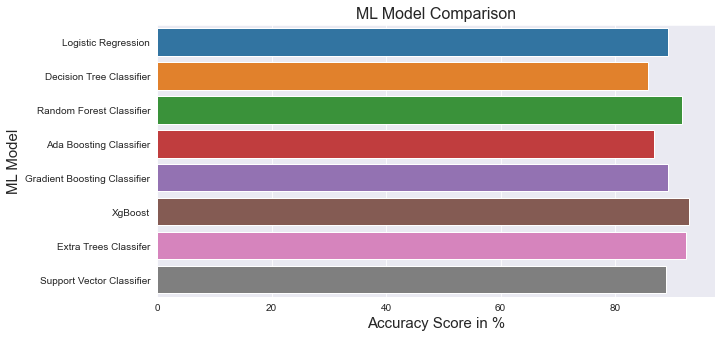

In [137]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that XGBoost(92.83%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so if we consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

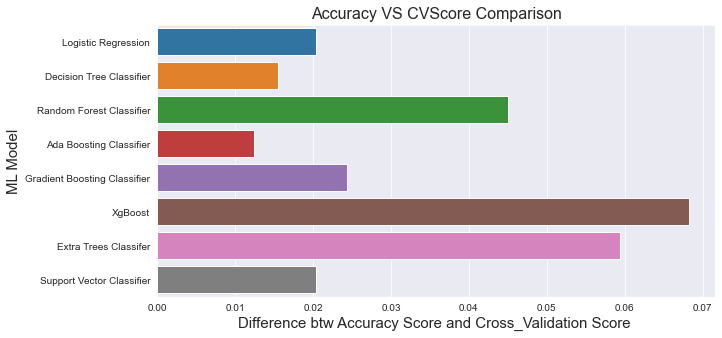

In [139]:
#Now focusing on the differnce btw Accuracy Score and Cross_Validation Scores
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is AdaBoost Classifier!

# Step 6.2 - Conclusion on Choice of Model

From the above we can see:
 - The Model with least difference is AdaBoost Classifer!

# Hence Optimum Machine Model Chosen = AdaBoost Classifer!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [140]:
parameter_grid={'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40],'algorithm':['SAMME','SAMME.R'],'random_state':[32,37,57,81,104,81,100,126,186]}

In [141]:
#Gridsearch
gridsearch = GridSearchCV(ada, parameter_grid, cv=5,scoring="accuracy")
gridsearch.fit(x_train_ns, y_train_ns);

In [142]:
#Get best hyperparameters
gridsearch.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.4,
 'n_estimators': 70,
 'random_state': 32}

Now lets use the best parameters.....

In [200]:
#Instantiating using the best parameters...
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.9,n_estimators=300,random_state=186)

In [201]:
#fitting the model...
ada.fit(x_train_ns,y_train_ns)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9, n_estimators=300,
                   random_state=186)

In [202]:
pred_test=ada.predict(x_test)

In [203]:
accuracy_score(y_test,pred_test)

0.8804780876494024

# Step 8 - ROC AUC PLOT

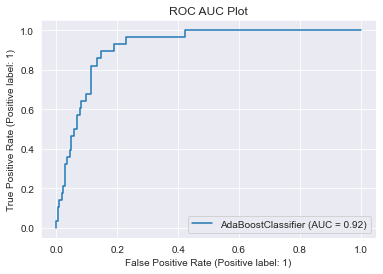

In [204]:
plot_roc_curve(ada,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

From the above we can see:
- Final Accuracy is 88% and AUC Score is 92% 
- That the AdaBoostClassifier has an AUC close to 1(i.e 0.92)

HENCE WE CAN CONCLUDE OUR MODEL IS PRETTY GOOD!!

# Step 9 - MODEL SAVING

In [205]:
filename='Machine_Model_Project_Red_Wine'
pickle.dump(ada,open(filename,'wb'))